In [1]:
import socket
import numpy as np

def start_server(host='localhost', port=30000, num_channels=8, fs=256):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(num_channels * 8)  # 8 bytes per double
            if not data:
                break
            sample = np.frombuffer(data, dtype=np.double)
            print(sample)
            # Process the sample (e.g., store or plot)

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()

if __name__ == "__main__":
    start_server()


Server listening on localhost:30000


In [2]:
import socket
import numpy as np

def start_server(host='localhost', port=30000, num_channels=8, fs=256):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(num_channels * 8)  # 8 bytes per double
            if not data:
                break
            sample = np.frombuffer(data, dtype=np.double)
            print(sample)
            # Process the sample (e.g., store or plot)

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()

if __name__ == "__main__":
    start_server()


Server listening on localhost:30000
Connection from ('127.0.0.1', 56829)


In [1]:
import socket
import numpy as np

def start_server(host='localhost', port=30000, num_channels=8):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(num_channels * 8)  # 8 bytes per double
            if not data:
                break
            sample = np.frombuffer(data, dtype=np.float64)  # Assuming double precision
            print(sample)
            # Process the sample (e.g., store or plot)

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()

if __name__ == "__main__":
    start_server()


Server listening on localhost:30000


In [1]:
# succeeded
import socket
import numpy as np

def start_server(host='127.0.0.1', port=30000, num_channels=8, fs=256):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    sample_set = []
    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(num_channels * 8)  # 8 bytes per double
            if not data:
                break
            sample = np.frombuffer(data, dtype=np.double)
            sample = sample.flatten()
            for element in sample:
                #print(element)
                sample_set.append(element)
            # Process the sample (e.g., store or plot)
        
        print(len(sample_set))

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()

if __name__ == "__main__":
    start_server()


Server listening on 127.0.0.1:30000
Connection from ('127.0.0.1', 52338)
1415150


Server listening on 127.0.0.1:30000
Connection from ('127.0.0.1', 64679)


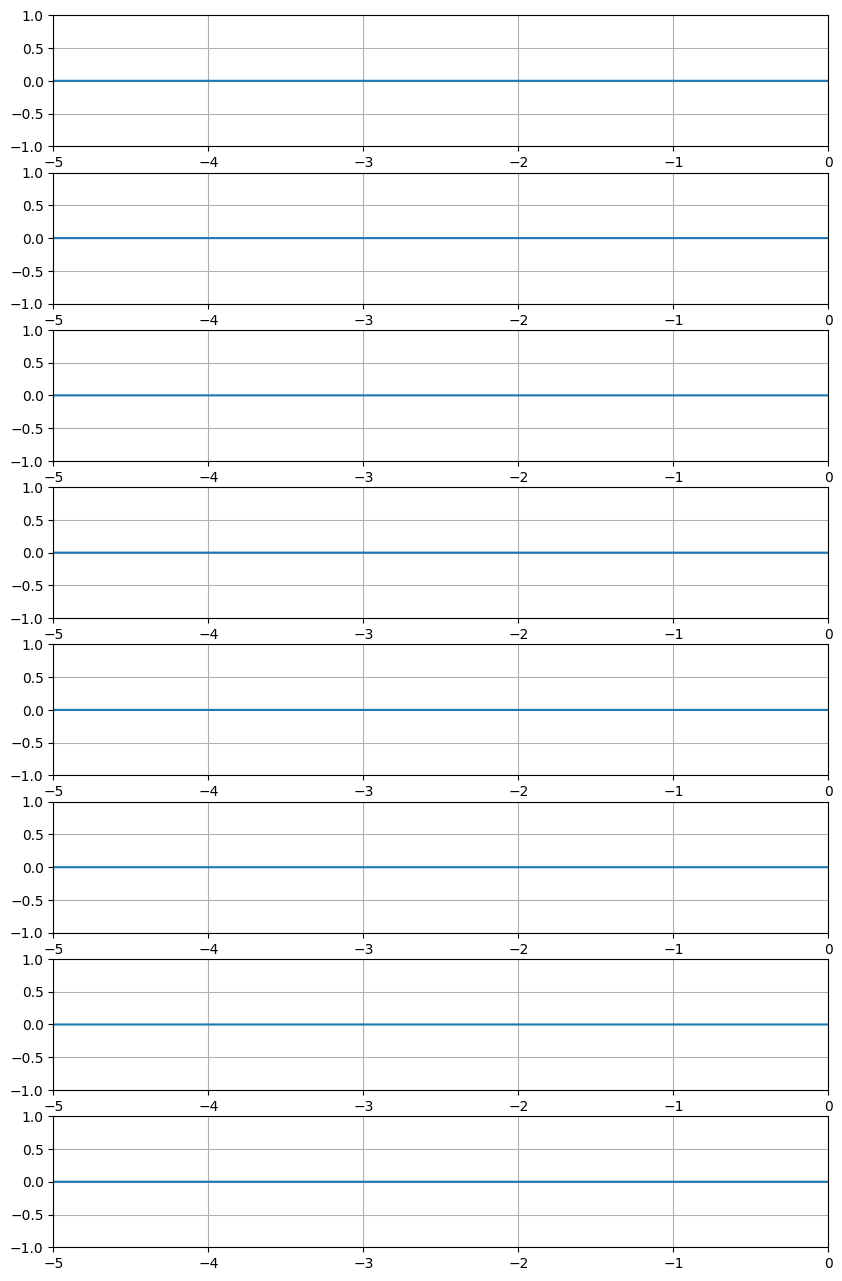

IndexError: index 1 is out of bounds for axis 0 with size 1

In [1]:
import socket
import numpy as np
import matplotlib.pyplot as plt

def start_server(host='127.0.0.1', port=30000, num_channels=8, fs=256):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    # Initialize plots
    plt.ion()
    fig, axes = plt.subplots(num_channels, 1, figsize=(10, num_channels * 2))
    if num_channels == 1:
        axes = [axes]  # Make axes iterable for a single channel

    buffer_size = 5 * fs  # Display 5 seconds of data
    data_buffers = [np.zeros(buffer_size) for _ in range(num_channels)]
    time_buffer = np.linspace(-5, 0, buffer_size)

    lines = []
    for ax in axes:
        line, = ax.plot(time_buffer, np.zeros(buffer_size))
        lines.append(line)
        ax.set_xlim([-5, 0])
        ax.set_ylim([-1, 1])  # Adjust based on your signal range
        ax.grid(True)

    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(num_channels * 8)  # 8 bytes per double
            if not data:
                break
            sample = np.frombuffer(data, dtype=np.double)

            # Update data buffers
            for i in range(num_channels):
                data_buffers[i] = np.append(data_buffers[i][1:], sample[i])

            # Update plots
            for i, line in enumerate(lines):
                line.set_ydata(data_buffers[i])
                axes[i].relim()
                axes[i].autoscale_view()

            plt.draw()
            plt.pause(0.01)

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()
        plt.ioff()
        plt.show()

if __name__ == "__main__":
    start_server()


In [2]:
import socket
import numpy as np
import matplotlib.pyplot as plt

def start_server(host='127.0.0.1', port=30000, num_channels=8, fs=256):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    # Initialize plots
    plt.ion()
    fig, axes = plt.subplots(num_channels, 1, figsize=(10, num_channels * 2))
    if num_channels == 1:
        axes = [axes]  # Make axes iterable for a single channel

    buffer_size = 5 * fs  # Display 5 seconds of data
    data_buffers = [np.zeros(buffer_size) for _ in range(num_channels)]
    time_buffer = np.linspace(-5, 0, buffer_size)

    lines = []
    for ax in axes:
        line, = ax.plot(time_buffer, np.zeros(buffer_size))
        lines.append(line)
        ax.set_xlim([-5, 0])
        ax.set_ylim([-1, 1])  # Adjust based on your signal range
        ax.grid(True)

    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(num_channels * 8)  # 8 bytes per double

            if len(data) != num_channels * 8:
                print(f"Received incomplete data: expected {num_channels * 8} bytes, got {len(data)} bytes.")
                continue

            sample = np.frombuffer(data, dtype=np.double)

            # Update data buffers
            for i in range(num_channels):
                data_buffers[i] = np.append(data_buffers[i][1:], sample[i])

            # Update plots
            for i, line in enumerate(lines):
                line.set_ydata(data_buffers[i])
                axes[i].relim()
                axes[i].autoscale_view()

            plt.draw()
            plt.pause(0.01)

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()
        plt.ioff()
        plt.show()

if __name__ == "__main__":
    start_server()


Server listening on 127.0.0.1:30000
Connection from ('127.0.0.1', 64706)


In [1]:
import socket
import numpy as np
import matplotlib.pyplot as plt

def start_server(host='127.0.0.1', port=30000, num_channels=8, fs=256, duration=3):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    # Initialize plots
    plt.ion()
    fig, axes = plt.subplots(num_channels, 1, figsize=(10, num_channels * 2))
    if num_channels == 1:
        axes = [axes]  # Make axes iterable for a single channel

    buffer_size = duration * fs  # Buffer size for 3 seconds of data
    data_buffers = [np.zeros(buffer_size) for _ in range(num_channels)]
    time_buffer = np.linspace(0, duration, buffer_size)

    lines = []
    for ax in axes:
        line, = ax.plot(time_buffer, np.zeros(buffer_size))
        lines.append(line)
        ax.set_xlim([0, duration])
        ax.set_ylim([-1, 1])  # Adjust based on your signal range
        ax.grid(True)

    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(num_channels * 8 * buffer_size)  # 8 bytes per double, buffer_size samples per channel

            if len(data) != num_channels * 8 * buffer_size:
                print(f"Received incomplete data: expected {num_channels * 8 * buffer_size} bytes, got {len(data)} bytes.")
                continue

            samples = np.frombuffer(data, dtype=np.double).reshape((num_channels, buffer_size))

            # Update data buffers
            for i in range(num_channels):
                data_buffers[i] = samples[i, :]

            # Update plots
            for i, line in enumerate(lines):
                line.set_ydata(data_buffers[i])
                axes[i].relim()
                axes[i].autoscale_view()

            plt.draw()
            plt.pause(0.01)

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()
        plt.ioff()
        plt.show()

if __name__ == "__main__":
    start_server()


Server listening on 127.0.0.1:30000


In [7]:
import socket
import numpy as np

def start_server(host='127.0.0.1', port=30000, num_channels=8, fs=256):
    # Create a TCP/IP socket
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print(f"Server listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr}")

    sample_set = []
    try:
        while True:
            # Receive data from MATLAB
            data = conn.recv(4096)  # Adjust the buffer size as needed
            if not data:
                break
            sample = np.frombuffer(data, dtype=np.double)
            sample = sample.flatten()
            for element in sample:
                sample_set.append(element)
        
        print(f"Received {len(sample_set)} samples")

    except KeyboardInterrupt:
        pass
    finally:
        conn.close()
        server_socket.close()

if __name__ == "__main__":
    start_server()


Server listening on 127.0.0.1:30000
Connection from ('127.0.0.1', 50076)


In [6]:
import socket
import struct
import time
import numpy as np

host = '127.0.0.1'
port = 30000

def receive_data(sock, chunk_size, num_channels):
    data = []
    for _ in range(chunk_size * num_channels):
        data.append(struct.unpack('d', sock.recv(8))[0])
    data = np.array(data).reshape((chunk_size, num_channels))
    return data

def main():
    chunk_size = 3 * 256  # 3 seconds * 256 Hz
    num_channels = 16     # Update this as per your configuration

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((host, port))
        s.listen()
        print("Waiting for connection...")
        conn, addr = s.accept()
        with conn:
            print('Connected by', addr)
            while True:
                start_time = time.time()
                data = receive_data(conn, chunk_size, num_channels)
                print(f"Received data at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())}")
                print(data)
                elapsed_time = time.time() - start_time
                time.sleep(max(0, 3 - elapsed_time))  # Ensure the loop runs every 3 seconds

if __name__ == '__main__':
    main()


Waiting for connection...
Connected by ('127.0.0.1', 61563)


In [6]:
import socket
import numpy as np

def main():
    host = '127.0.0.1'
    port = 30000
    chunk_size = 256 * 3  # 3 seconds of data at 256 Hz
    num_channels = 10  # Adjust this to the total number of channels you have

    # Create a socket object
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

    # Bind the socket to the host and port
    server_socket.bind((host, port))

    # Listen for incoming connections
    server_socket.listen(1)
    print("Waiting for a connection...")
    
    conn, addr = server_socket.accept()
    print("Connected by", addr)
    
    try:
        while True:
            # Receive data
            data = conn.recv(chunk_size * num_channels * 8)  # Each double is 8 bytes
            
            if not data:
                break
            
            # Convert bytes to numpy array
            data_array = np.frombuffer(data, dtype=np.float64)
            data_array = data_array.reshape((chunk_size, num_channels))

            # Print data or process further
            print(data_array)
    
    except Exception as e:
        print("An error occurred:", e)
    
    finally:
        conn.close()
        server_socket.close()

if __name__ == "__main__":
    main()


Waiting for a connection...
Connected by ('127.0.0.1', 50058)
An error occurred: cannot reshape array of size 1 into shape (768,10)


In [3]:
#biotest_12
import socket
import json

def start_server(host='127.0.0.1', port=30000):
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    print("Server listening on port", port)

    conn, addr = server_socket.accept()
    print("Connected by", addr)
    
    try:
        while True:
            data = conn.recv(4096)
            if not data:
                break
            json_data = data.decode('utf-8')
            array_data = json.loads(json_data)
            print("Received data:", array_data)
    except Exception as e:
        print("Error:", e)
    finally:
        conn.close()
        server_socket.close()

if __name__ == "__main__":
    start_server()


Server listening on port 30000
Connected by ('127.0.0.1', 49932)
Error: 'utf-8' codec can't decode byte 0xa1 in position 1: invalid start byte


In [1]:
#Bio radio 13

import socket
import struct

# Set up the server to listen for connections
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_socket.bind(('127.0.0.1', 30000))
server_socket.listen(1)
print('Server listening on port 30000')

# Accept a connection
conn, addr = server_socket.accept()
print('Connected by', addr)

try:
    while True:
        # Read the length of the data (4 bytes for an integer)
        data_length_bytes = conn.recv(4)
        if not data_length_bytes:
            break
        data_length = struct.unpack('i', data_length_bytes)[0]
        print(f"Expecting {data_length} data points")

        # Read the data (8 bytes for each double)
        data = []
        while len(data) < data_length:
            chunk = conn.recv(8 * (data_length - len(data)))
            if not chunk:
                break
            for i in range(0, len(chunk), 8):
                data.append(struct.unpack('d', chunk[i:i+8])[0])

        print('Received data:', data)

except Exception as e:
    print('Error:', e)

finally:
    conn.close()
    server_socket.close()


Server listening on port 30000


# Training the models

In [1]:
# Import the required libraries

#Importing the required libraries
from scipy.io import loadmat, savemat
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
#Defining functions

def y_constructor(y_array):
    y_array1 = np.zeros(y_array.shape[0])
    y_array2 = np.zeros(y_array.shape[0])
    y_array3 = np.zeros(y_array.shape[0])
    y_array4 = np.zeros(y_array.shape[0])
    for i in range(y_array.shape[0]):
        if y_array[i] == 0:
            y_array1[i] = 1
        elif y_array[i] == 1:
            y_array2[i] = 1
        elif y_array[i] == 2:
            y_array3[i] = 1
        elif y_array[i] == 3:
            y_array4[i] = 1
    return y_array1,y_array2,y_array3,y_array4

def plot_confusion_matrix(y_test, y_pred, classes):
    """
    Plot confusion matrix.
    
    Parameters:
        y_test (array-like): True labels.
        y_pred (array-like): Predicted labels.
        classes (array-like): Names of the classes.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def model_returner(model,x,y):
    model.fit(x,y)
    return model

In [4]:
#constructing the data
data_path = r"F:\Engineering\Semester 7\EE - 405 Undergraduate Project\26.01\bigdata.mat"
data_mat = loadmat(data_path)
print(data_mat.keys())
feature_array = data_mat['feature_array']
unscaled_array = data_mat['unscaled_array']
y_array1 = np.concatenate([np.ones(4005),np.zeros(4005*3)])
y_array2 = np.concatenate([np.zeros(4005),np.ones(4005),np.zeros(4005*2)])
y_array3 = np.concatenate([np.zeros(4005*2),np.ones(4005),np.zeros(4005)])
y_array4 = np.concatenate([np.zeros(4005*3),np.ones(4005)])
y_array = np.concatenate([np.zeros(4005),np.ones(4005),np.full(4005,2),np.full(4005,3)])

scaler = StandardScaler()
scaled_array = scaler.fit_transform(feature_array)

#importing required models

model_svc = SVC(probability = True)

dict_keys(['__header__', '__version__', '__globals__', 'feature_array', 'unscaled_array'])


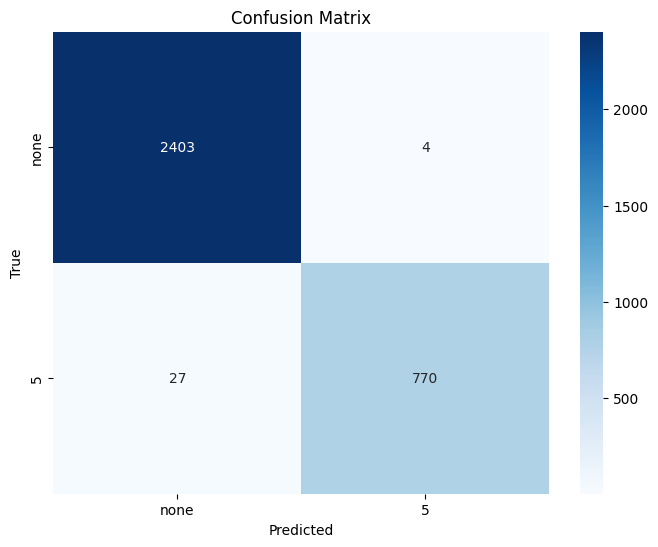

5Hz accuracy = 0.9903245942571786


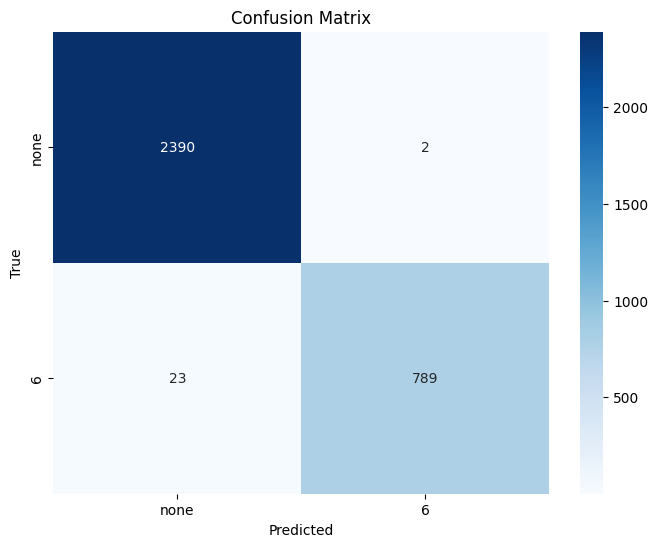

6Hz accuracy = 0.9921972534332085


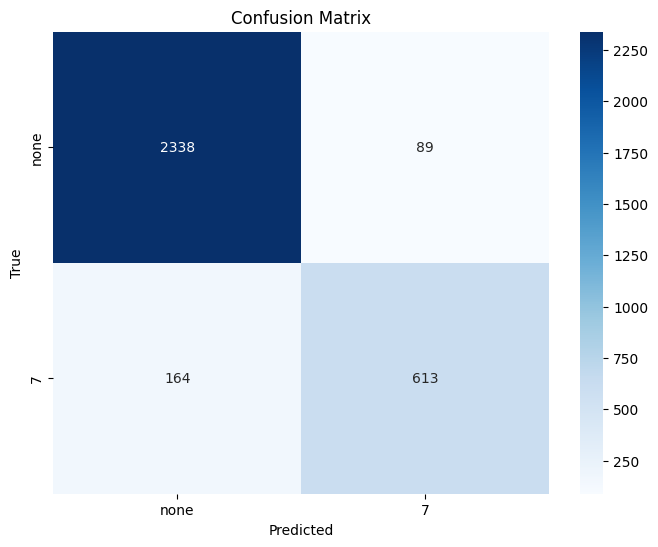

7Hz accuracy = 0.9210362047440699


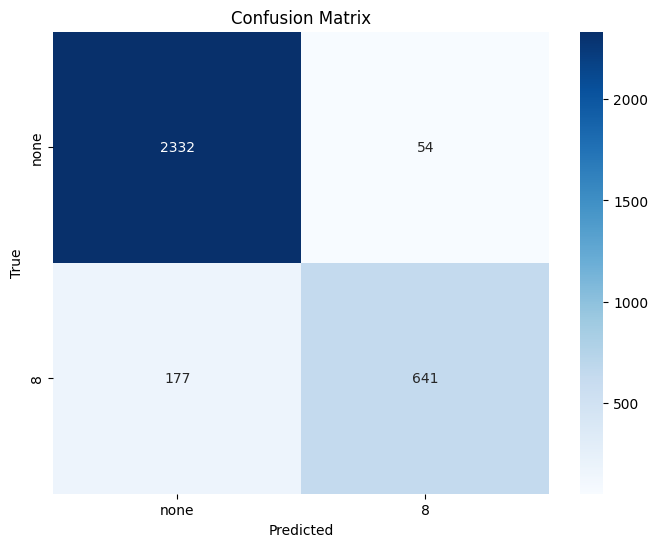

8Hz accuracy = 0.9279026217228464


In [5]:
#letus test new approach

x_train , x_test, y_train, y_test = train_test_split(scaled_array,y_array,test_size = 0.2)
y_train1, y_train2, y_train3, y_train4 = y_constructor(y_train)
y_test1, y_test2, y_test3, y_test4 = y_constructor(y_test)
model1 = model_returner(model_svc,x_train,y_train1)
y_pred1 = model1.predict(x_test)
y_prob1 = model1.predict_proba(x_test)
plot_confusion_matrix(y_test1, y_pred1, ["none", '5'])
print(f"5Hz accuracy = {accuracy_score(y_pred1,y_test1)}")
model2 = model_returner(model_svc,x_train,y_train2)
y_pred2 = model2.predict(x_test)
y_prob2 = model2.predict_proba(x_test)
plot_confusion_matrix(y_test2, y_pred2, ["none", '6'])
print(f"6Hz accuracy = {accuracy_score(y_pred2,y_test2)}")
model3 = model_returner(model_svc,x_train,y_train3)
y_pred3 = model3.predict(x_test)
y_prob3 = model3.predict_proba(x_test)
plot_confusion_matrix(y_test3, y_pred3, ["none", '7'])
print(f"7Hz accuracy = {accuracy_score(y_pred3,y_test3)}")
model4 = model_returner(model_svc,x_train,y_train4)
y_pred4 = model4.predict(x_test)
y_prob4 = model4.predict_proba(x_test)
plot_confusion_matrix(y_test4, y_pred4, ["none", '8'])
print(f"8Hz accuracy = {accuracy_score(y_pred4,y_test4)}")

In [6]:
matrix = np.random.rand(192)
print(matrix.shape)
matrix_reshaped = matrix.reshape(1,-1)
model1.predict_proba(matrix_reshaped)
matrix_reshaped.shape

(192,)


(1, 192)

# Reading CSV files Technique

In [1]:
#working with neccessary models
import pickle
import os
import time
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
#import the required models

model_path1 = r"F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\Saved Models\modeltrial1.pkl"
model_path2 = r"F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\Saved Models\modeltrial2.pkl"
model_path3 = r"F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\Saved Models\modeltrial3.pkl"
model_path4 = r"F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\Saved Models\modeltrial4.pkl"

with open(model_path1, 'rb') as file:
    model1 = pickle.load(file)

with open(model_path2, 'rb') as file:
    model2 = pickle.load(file)

with open(model_path3,'rb') as file:
    model3 = pickle.load(file)

with open(model_path4,'rb') as file:
    model4 = pickle.load(file)

In [3]:
# preprocessing functions

def ff_transform(time_signal, frequency):

    '''- INPUTS -
    time_signal : the time domain matrix that to be converted into the fourier domain (it shoulf be in a 1D array of any size)
    frequency : the sampling frequency at which the eeg signals are captured

    OUTPUTS
    frequencies : 1D array containinf the frequencies of the output
    frequency_domain : the corresponding magnitutes are given as an array with respective to the frequencies. The output is given as a complex number
    '''
    # Perform Fourier transformation
    frequencies = np.fft.fftfreq(len(time_signal),d = 1/frequency)
    frequency_domain = np.fft.fft(time_signal)
    return frequencies, frequency_domain

def extract_harmonics(frequencies, frequency_domain, target_frequency, num_harmonics):
    ''' 
    -INPUTS
    frequencies, frequency_domain : same outputs as the ff_transform function
    target_frequency : the expected frequency, eg: when the target frequency is 5 the magnitudes of the closed components are intergrated
    num_harmonics : How many harmonics requered
    
    -OUTPUT
    returns a vector with magnitudes of the frequencies and harmonics.
    eg : if target_frequency = 5 & num_harmonics = 4
    the function outputs the magnitudes corresponding to [5,10,15,20]
    '''
    target_indices = []
    for i in range(num_harmonics):
        target_index = np.abs(frequencies-(i+1)*target_frequency).argmin()
        target_indices.append(target_index)
        #print(target_index)
    
    #feature_vector = np.zeros(num_harmonics)
    feature_vector = []
    for j in target_indices:
        feature = (frequency_domain[j] + frequency_domain[j+1] + frequency_domain[j-1] + frequency_domain[j-2]+frequency_domain[j+2])/5
        feature_vector.append(feature)
        #feature_vector[i] = feature

    #print(target_index)
    return np.array(feature_vector)

scaler = MinMaxScaler()
def all_features_per_channel(frequencies , frequency_domain, target_frequency_array, num_harmonics):
    ''' -INPUTS-
    frequencies, frequency_domain : same as the output of the ff_trainsform
    target_frequency_array : [6.5, 7,5, 8.5, 12]
    num_harmonics : 2

    - OUTPUTS
    1D array containing the features corresponds to [5,10,15,6,12,18,7,14,21,8,16,24] 
    '''
    all_features_of_channel = []
    for target_frequency in target_frequency_array:
        feature_vector = abs(extract_harmonics(frequencies,frequency_domain,target_frequency,num_harmonics))
        all_features_of_channel.append(feature_vector)
    all_features_of_channel = np.array(all_features_of_channel).flatten()
    data_2d = [[x] for x in all_features_of_channel]
    scaled_data = scaler.fit_transform(data_2d)
    all_features_of_channel = np.array([x[0] for x in scaled_data])
    all_features_of_channel_unscaled = np.array([x[0] for x in data_2d])
    return all_features_of_channel, all_features_of_channel_unscaled

def features(channel_signal,sampling_frequency,target_array, num_harmonics):
    """
    assuming that the channel_signal is in the format of (256*3, 16)
    [channel01 features, channel02 features, channel03 features, channel04 features...]
    """
    
    feeding_data = []
    feeding_data_unscaled = []
    for channel in range(channel_signal.shape[1]):
        frequencies, frequency_domain = ff_transform(channel_signal[:,channel],sampling_frequency)
        channel_features, channel_features_unscaled = all_features_per_channel(frequencies, frequency_domain, target_array, num_harmonics)
        feeding_data.append(channel_features)
        feeding_data_unscaled.append(channel_features_unscaled)
    
    feeding_array = np.concatenate(feeding_data, axis = 0).flatten()
    return feeding_array

# Function to make predictions
def make_predictions(feeding_array, model_trial1, model_trial2, model_trial3, model_trial4):
    probability1 = model1.predict_proba(feeding_array)
    if probability1[0] > 0.5 :
        return 1 # Moving Up
    else: 
        probability2 = model2.predict_proba(feeding_array)
        if probability2[0]> 0.5:
            return 2 # Moving Down
        else:
            probability3 = model3.predict_proba(feeding_array)
            if probability3[0] > 0.81:
                return 3
            else:
                probability4 = model4.predict_proba(feeding_array)
                if probability4[0] > 0.81:
                    return 4
                else:
                    return 0

In [1]:
#bio_test 14 
# working with csvs

import os
import time
import pandas as pd
from datetime import datetime

def monitor_directory(directory):
    # Get the initial list of files in the directory
    previous_files = set(os.listdir(directory))
    print("Monitoring directory:", directory)

    while True:
        # Get the current list of files in the directory
        current_files = set(os.listdir(directory))

        # Determine the new files by comparing current files with previous files
        new_files = current_files - previous_files
        
        if new_files:
            for new_file in new_files:
                print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - New file detected: {new_file}")
                file_path = os.path.join(directory, new_file)

                try:
                    df = pd.read_csv(file_path, header=None)
                    print(f"Dimensions of the data in {new_file}: {df.shape}")

                    # Uncomment and customize the following code if you want to process the data further:
                    '''
                    array = df.to_numpy()
                    feeding_array = features(array, 250, [5, 6, 7, 8], 16)
                    feeding_reshaped = feeding_array.reshape(-1, 1)
                    feeding_reshaped[np.isnan(array)] = 0
                    print(feeding_reshaped.shape)
                    '''

                except pd.errors.EmptyDataError:
                    print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - New file detected but it is empty or contains no data: {new_file}")
                except Exception as e:
                    print(f"Error reading {new_file}: {e}")

        # Update the previous file list
        previous_files = current_files

        # Wait for a short period before checking again
        time.sleep(0.01)

# Example usage
directory_to_monitor = r"F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\csv files"
monitor_directory(directory_to_monitor)





Monitoring directory: F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\csv files
2024-08-08 22:26:13 - New file detected: BioPotentialSignals_002.csv
Dimensions of the data in BioPotentialSignals_002.csv: (171, 3)
2024-08-08 22:26:16 - New file detected: BioPotentialSignals_003.csv
2024-08-08 22:26:16 - New file detected but it is empty or contains no data: BioPotentialSignals_003.csv
2024-08-08 22:26:19 - New file detected: BioPotentialSignals_004.csv
2024-08-08 22:26:19 - New file detected but it is empty or contains no data: BioPotentialSignals_004.csv
2024-08-08 22:26:22 - New file detected: BioPotentialSignals_005.csv
Dimensions of the data in BioPotentialSignals_005.csv: (171, 3)
2024-08-08 22:26:25 - New file detected: BioPotentialSignals_006.csv
2024-08-08 22:26:25 - New file detected but it is empty or contains no data: BioPotentialSignals_006.csv
2024-08-08 22:26:28 - New file detected: BioPotentialSignals_007.csv
2024-08-08 22:26:28 - New file detected but it is emp

KeyboardInterrupt: 

In [2]:
file_test = r"F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\csv files\BioPotentialSignals_005.csv"
df = pd.read_csv(file_test)
df.shape

(749, 3)

In [3]:
import os
import time
import pandas as pd
from datetime import datetime

def is_file_fully_written(file_path, check_interval=0.1, max_checks=5):
    """Check if the file is still being written by monitoring its size."""
    previous_size = -1
    for _ in range(max_checks):
        current_size = os.path.getsize(file_path)
        if current_size == previous_size:
            return True
        previous_size = current_size
        time.sleep(check_interval)
    return False

def monitor_directory(directory):
    # Get the initial list of files in the directory
    previous_files = set(os.listdir(directory))
    print("Monitoring directory:", directory)

    while True:
        # Get the current list of files in the directory
        current_files = set(os.listdir(directory))

        # Determine the new files by comparing current files with previous files
        new_files = current_files - previous_files
        
        if new_files:
            for new_file in new_files:
                print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - New file detected: {new_file}")
                file_path = os.path.join(directory, new_file)

                if is_file_fully_written(file_path):
                    try:
                        df = pd.read_csv(file_path, header=None)
                        print(f"Dimensions of the data in {new_file}: {df.shape}")

                        # Uncomment and customize the following code if you want to process the data further:
                        '''
                        array = df.to_numpy()
                        feeding_array = features(array, 250, [5, 6, 7, 8], 16)
                        feeding_reshaped = feeding_array.reshape(-1, 1)
                        feeding_reshaped[np.isnan(array)] = 0
                        print(feeding_reshaped.shape)
                        '''

                    except pd.errors.EmptyDataError:
                        print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - New file detected but it is empty or contains no data: {new_file}")
                    except Exception as e:
                        print(f"Error reading {new_file}: {e}")
                else:
                    print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - File not fully written yet: {new_file}")

        # Update the previous file list
        previous_files = current_files

        # Wait for a short period before checking again
        time.sleep(0.01)

# Example usage
directory_to_monitor = r"F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\csv files"
monitor_directory(directory_to_monitor)


Monitoring directory: F:\Engineering\Semester 8\EE406 - Undergraduate Project 2\csv files
2024-08-08 22:43:38 - New file detected: BioPotentialSignals_002.csv
Dimensions of the data in BioPotentialSignals_002.csv: (750, 3)
2024-08-08 22:43:41 - New file detected: BioPotentialSignals_003.csv
Dimensions of the data in BioPotentialSignals_003.csv: (750, 3)
2024-08-08 22:43:44 - New file detected: BioPotentialSignals_004.csv
Dimensions of the data in BioPotentialSignals_004.csv: (750, 3)
2024-08-08 22:43:48 - New file detected: BioPotentialSignals_005.csv
Dimensions of the data in BioPotentialSignals_005.csv: (750, 3)
2024-08-08 22:43:51 - New file detected: BioPotentialSignals_006.csv
Dimensions of the data in BioPotentialSignals_006.csv: (750, 3)
2024-08-08 22:43:54 - New file detected: BioPotentialSignals_007.csv
Dimensions of the data in BioPotentialSignals_007.csv: (750, 3)
2024-08-08 22:43:57 - New file detected: BioPotentialSignals_008.csv
Dimensions of the data in BioPotentialSigna

KeyboardInterrupt: 